# Assignment 2
## Group Members:
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
### Chukwudumebi Ubogu, e-mail: gusuboch@student.gu.se
***

## Task 1: Working with a dataset with categorical features
***

### Step 1. Reading the data

In [17]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Read the data
train_data = pd.read_csv('adult_train.csv')
test_data = pd.read_csv('adult_test.csv')

# Prepare the feature vectors and target values
# Split the features and target values for both the training and test data
X_train = train_data.drop('target', axis=1)
X_test = test_data.drop('target', axis=1)
Y_train = train_data['target']
Y_test = test_data['target']

In [18]:
# Checking the data
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States


In [19]:
X_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [20]:
Y_train.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4     >50K
Name: target, dtype: object

In [21]:
Y_test.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: target, dtype: object

### Step 2: Encoding the features as numbers.

In [22]:
# Initialize the vectorizer for categorical feature encoding
vec = DictVectorizer(sparse=False)

# Convert training and test data into list of feature dictionaries for vectorization
X_train_dict = X_train.to_dict(orient='records')
X_test_dict = X_test.to_dict(orient='records')

# Fit vectorizer to training data and transform both training and test data
X_train_encoded = vec.fit_transform(X_train_dict)
X_test_encoded = vec.transform(X_test_dict)

# Verify the dimensions of the encoded datasets
X_train_encoded.shape, X_test_encoded.shape

((32561, 107), (16281, 107))

In [23]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training and test data
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [24]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=5000)

# Perform cross-validation on the scaled training set
cross_val_scores = cross_val_score(logistic_regression_classifier, X_train_scaled, Y_train, cv=5)

# Calculate the mean accuracy from the cross-validation scores
mean_cv_accuracy = np.mean(cross_val_scores)

# View the mean accuracy
mean_cv_accuracy

0.8513560197691934

### Step 3. Combining the steps.

In [25]:
# Create a pipeline that first vectorizes the dictionary data
# Then scales the data and then applies logistic regression
pipeline = make_pipeline(
    DictVectorizer(sparse=False),
    StandardScaler(),
    LogisticRegression(max_iter=5000)
)

# Train the pipeline with the training data
pipeline.fit(X_train_dict, Y_train)

# Perform 5-fold cross-validation to assess the robustness of the model
cross_val_scores = cross_val_score(pipeline, X_train_dict, Y_train, cv=5)

# Compute the mean cross-validation accuracy to estimate the model's performance
mean_cv_accuracy = np.mean(cross_val_scores)

# Evaluate the pipelines accuracy on the test data
test_accuracy = pipeline.score(X_test_dict, Y_test)

mean_cv_accuracy, test_accuracy

(0.8513253072384808, 0.8517904305632332)

## Logistic Regression Model Performance Summary
* The Logistic Regression classifier achieved a mean accuracy of approximately 85.14% on the training set. This performance metric suggests that the model has a robust predictive capability with respect to the dataset used.

* Furthermore the assessment of the model on the test dataset resulted in an accuracy of about 85.18% which is consistent with the cross-validation results. This consistency between cross-validation and test accuracy indicates that the model generalizes well to unseen data.

## Task 2: Decision trees and random forests
***

In [26]:
def evaluate_decision_tree_depths(X_train_dict, Y_train, max_depths):
    # Dictionary to hold the mean accuracy for each tree depth
    cv_scores = {}

    # Initialize the DictVectorizer to handle categorical features
    vec = DictVectorizer(sparse=False)

    # Loop over the range of depths to evaluate
    for depth in max_depths:
        # Create a pipeline with a vectorizer followed by a decision tree classifier at the given depth
        dt_pipeline = make_pipeline(vec, DecisionTreeClassifier(max_depth=depth))

        # Perform 5-fold cross-validation and compute the mean accuracy for the current tree depth
        scores = cross_val_score(dt_pipeline, X_train_dict, Y_train, cv=5, scoring='accuracy')
        cv_scores[depth] = np.mean(scores)

    # Return the dictionary of mean accuracy scores for each depth
    return cv_scores

# The range of depths we decided to evaluate
max_depths = range(1, 21)

# Evaluate the decision tree classifier over the range of depths
dt_scores = evaluate_decision_tree_depths(X_train_dict, Y_train, max_depths)

# View the depth scores
dt_scores

{1: 0.7591904454179904,
 2: 0.8282301726164002,
 3: 0.8437702604618773,
 4: 0.8443845110761279,
 5: 0.849022023048969,
 6: 0.8545192689653767,
 7: 0.8555020180768684,
 8: 0.8554405694375754,
 9: 0.8551335148640538,
 10: 0.8578360855306963,
 11: 0.8570990130870371,
 12: 0.8547649833577976,
 13: 0.8524002693912873,
 14: 0.8505575505575506,
 15: 0.8484997874219433,
 16: 0.8453365287946127,
 17: 0.8427261287291227,
 18: 0.8394707938121112,
 19: 0.8386721878488345,
 20: 0.8369830175219397}

In [27]:
def evaluate_random_forest(X_train_dict, Y_train, n_estimators_list, max_depths):
    # Dictionary to store cross-validation mean accuracy scores
    rf_scores = {}

    # Create a vectorizer for converting categorical features
    vec = DictVectorizer(sparse=False)

    # Loop over each combination of n_estimators and max_depth values
    for n_estimators in n_estimators_list:
        for depth in max_depths:
            # Set up a pipeline that includes vectorization and the random forest classifier
            rf_pipeline = make_pipeline(vec, RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, n_jobs=-1))

            # Perform cross-validation to evaluate the model's performance
            scores = cross_val_score(rf_pipeline, X_train_dict, Y_train, cv=5, scoring='accuracy')

            # Record the mean of the cross-validation accuracy scores
            rf_scores[(n_estimators, depth)] = np.mean(scores)

    # Return the dictionary of scores
    return rf_scores

# The list of n_estimators values and the range of max_depths we decided to evaluate
n_estimators_list = [10, 50, 100, 200]
max_depths = range(1, 21)

# Evaluate the random forest classifier over the range of parameters
rf_scores = evaluate_random_forest(X_train_dict, Y_train, n_estimators_list, max_depths)

# Output the scores for each parameter combination
rf_scores

{(10, 1): 0.7591904454179904,
 (10, 2): 0.7724578484309023,
 (10, 3): 0.805410950919933,
 (10, 4): 0.8155460483304795,
 (10, 5): 0.8303186907228823,
 (10, 6): 0.8438624546408977,
 (10, 7): 0.8434014271589122,
 (10, 8): 0.8487146808254593,
 (10, 9): 0.8523388443298623,
 (10, 10): 0.8545500097895307,
 (10, 11): 0.8556248729152921,
 (10, 12): 0.8570375361543026,
 (10, 13): 0.856331308277416,
 (10, 14): 0.8559627201842771,
 (10, 15): 0.8581124417202262,
 (10, 16): 0.8567919537979417,
 (10, 17): 0.8592180833947302,
 (10, 18): 0.8598016403405625,
 (10, 19): 0.8563312894151217,
 (10, 20): 0.8563927191921203,
 (50, 1): 0.7591904454179904,
 (50, 2): 0.7679738708181822,
 (50, 3): 0.7920517686984753,
 (50, 4): 0.8244833617588109,
 (50, 5): 0.8357238084782995,
 (50, 6): 0.8432788505393297,
 (50, 7): 0.8451521451521451,
 (50, 8): 0.8504959793133446,
 (50, 9): 0.8553485497347773,
 (50, 10): 0.8577439479385587,
 (50, 11): 0.857958916791252,
 (50, 12): 0.8582354097324156,
 (50, 13): 0.8591873991574591

In [32]:
def plot_dt_scores(dt_scores):
    # Set up the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Retrieve max depths and their corresponding accuracy scores
    depths = list(dt_scores.keys())
    scores = list(dt_scores.values())

    # Plot the accuracy scores for each max depth
    plt.plot(depths, scores, marker='o')
    plt.xlabel('Max Depth of Tree')
    plt.ylabel('Validation Accuracy')
    plt.title('Decision Tree Classifier Performance')
    plt.grid(True)
    plt.show()

In [33]:
def plot_rf_scores(rf_scores, n_estimators_list):
    # Set up the figure size for the plot
    plt.figure(figsize=(12, 8))

    # Plot accuracy scores for each tree count in the random forest
    for n_estimators in n_estimators_list:
        # Filter scores for the current number of trees
        depths = [depth for (estimators, depth), score in rf_scores.items() if estimators == n_estimators]
        scores = [score for (estimators, depth), score in rf_scores.items() if estimators == n_estimators]

        # Plot the accuracy for the current number of trees
        plt.plot(depths, scores, marker='o', label=f'{n_estimators} Trees')

    plt.xlabel('Max Depth of Trees')
    plt.ylabel('Validation Accuracy')
    plt.title('Random Forest Classifier Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

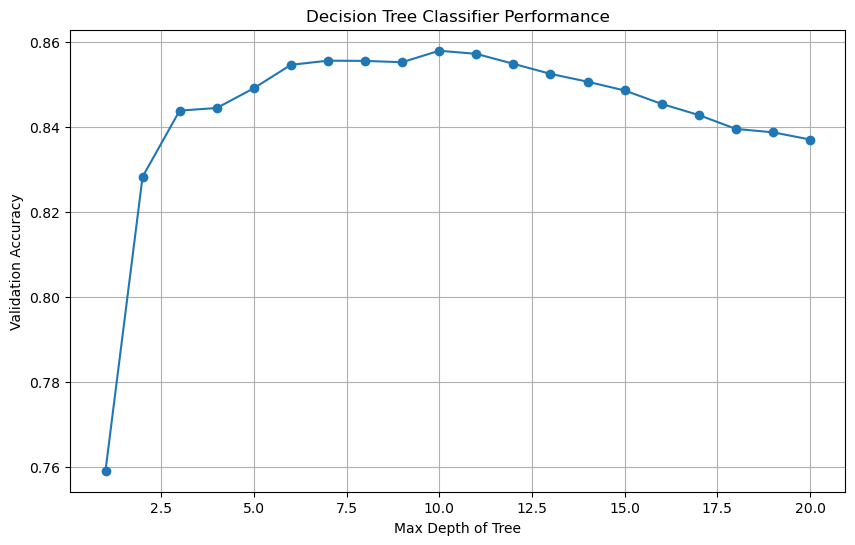

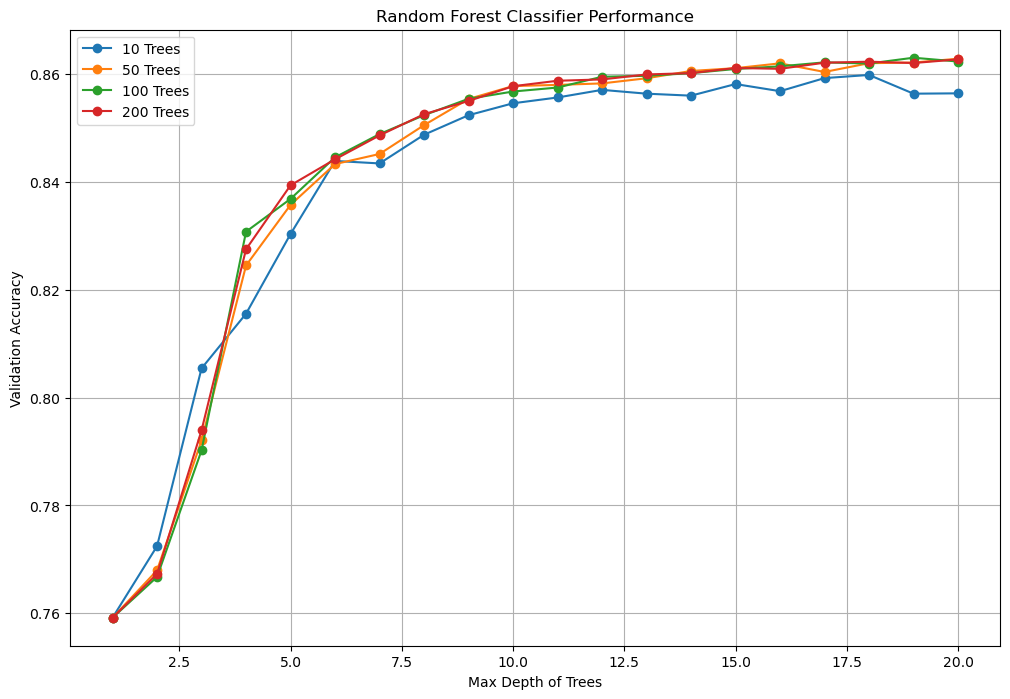

In [34]:
# Plot the decision tree and random forest scores
plot_dt_scores(dt_scores)
plot_rf_scores(rf_scores, n_estimators_list)

### Discussion:
#### What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?
- **Decision Tree Curve:** It shows an increase in accuracy as the depth increases initially to which then it plateaus or slightly declines suggesting that overfitting might be in play when the tree becomes too deep.
- **Random Forest with Ensemble Size of 1:**  If a Random Forest had only one tree the curve would essentially be that of a single decision tree since Random Forest is an ensemble of decision trees Therefore there would be no curve is presented for a Random Forest with a single tree, but if it were, it would closely follow the curve of the Decision Tree Classifier.

#### What happens with the curve for random forests as the ensemble size grows?
- As the ensemble size grows, the curves become smoother and the accuracy plateaus at a higher level for deeper trees. This is because Random Forests reduce overfitting by averaging the results of individual trees which tend to have high variance when they are deep.

#### What happens with the best observed test set accuracy as the ensemble size grows?
- As the ensemble size increases the best observed test set accuracy typically improves reaching an optimum threshold. This trend reflects the ensemble model's defense against overfitting achieved through using the collective insights of numerous decision trees which in turn helps its generalization abiliyu beyond those of an individual deeply structured tree.

#### What happens with the training time as the ensemble size grows?
- The training time increases with the ensemble size. More trees mean more computation as each tree has to be trained independently of the others. The use of the n_jobs=-1 parameter allows for parallel computation which can mitigate this by using all available CPU cores. However, the increase in computational load is still significant hence the training time will increase.

## Task 3: Feature importances in random forest classifiers
***

In [31]:
# Construct a pipeline with a DictVectorizer and a RandomForestClassifier
pipeline = make_pipeline(
    DictVectorizer(sparse=False),
    RandomForestClassifier(n_estimators=100, n_jobs=-1)
)

# Train the pipeline using the training dataset
pipeline.fit(X_train_dict, Y_train)

# Extract the DictVectorizer and RandomForestClassifier instances from the pipeline for further analysis
vec = pipeline.named_steps['dictvectorizer']
rf = pipeline.named_steps['randomforestclassifier']

# Obtain the feature importance values from the RandomForestClassifier
importances = rf.feature_importances_

# Retrieve the feature names processed by DictVectorizer
feature_names = vec.get_feature_names_out()

# Combine the feature names and their importances
features_importance = zip(feature_names, importances)

# Sort the features by importance in descending order
sorted_feature_importances = sorted(features_importance, key=lambda x: x[1], reverse=True)

# Display the top 10 most influential features with their respective importance scores
for feature, importance in sorted_feature_importances[:10]:
    print(f"Feature: {feature} → Importance: {importance}")

Feature: age → Importance: 0.22729854878109454
Feature: hours-per-week → Importance: 0.11260275280045388
Feature: capital-gain → Importance: 0.10866444154562759
Feature: marital-status=Married-civ-spouse → Importance: 0.06403920758681911
Feature: education-num → Importance: 0.05934949915079966
Feature: relationship=Husband → Importance: 0.04634751528199982
Feature: capital-loss → Importance: 0.03550914959421561
Feature: marital-status=Never-married → Importance: 0.021872375941927796
Feature: occupation=Prof-specialty → Importance: 0.01954511740218775
Feature: occupation=Exec-managerial → Importance: 0.01915913326658423


### Interpretation:
1. **Age (Importance: 0.23):** Age is commonly correlated with experience and career progression which could lead to higher salaries. As individuals age they typically gain skills and higher jobs which are compensated with increased earnings.
2. **Hours per week (Importance: 0.12):** The number of hours worked per week is a good indicator of income as it is directly correlated with the amount of money earned. The more hours worked the higher the income.
3. **Capital gain (Importance: 0.11):** Capital gain is the profit from the sale of an investment. It is a good indicator of income as it is directly correlated with the amount of money earned.
4. **Marital status_Married-civ-spouse (Importance: 0.06):** Married individuals tend to have higher incomes than unmarried individuals. This is because married individuals tend to have more responsibilities and hence are more likely to work more hours and earn more money.   
5. **Education num (Importance: 0.05):** Education is a good indicator of income as it is directly correlated with the amount of money earned. The more educated an individual is the higher their income.
6. **Relationship_Husband (Importance: 0.04):** Similar to marital status, individuals who are husbands tend to have higher incomes than unmarried individuals. Probably a relation to the increased responsibilities of being a husband.
7. **Capital loss (Importance: 0.04):** Capital loss is the loss from the sale of an investment. It is a good indicator of income as it is directly correlated with the amount of money earned.
8. **Education_ Bachelors (Importance: 0.03):** Education is a good indicator of income as it is directly correlated with the amount of money earned. The more educated an individual is the higher their income.
9. **Occupation_ Exec-managerial (Importance: 0.03):** Executive managerial positions are typically high paying jobs. Therefore, individuals in these positions tend to have higher incomes.
10. **Occupation_ Prof-specialty (Importance: 0.03):** Professional specialty positions are typically high paying jobs. Therefore, individuals in these positions tend to have higher incomes.

## Alternative way to compute importance
### Permutation Importance
Permutation important could be another way to measure feature significance regardless of the model used. It involves the following steps:
1. Train the model and record accuracy.
2. Shuffle a single feature's values, disrupting its correlation with the target.
3. Re-evaluate accuracy and note the difference.
4. Repeat for each feature.
This method shines in pinpointing crucial features especially in datasets with interdependent predictors by focusing on the impact of each on model performance.